# Line images and ratios from 30 Dor MUSE data

In [54]:
from pathlib import Path
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import cmasher as cm
from mpdaf.obj import Image
from astropy.io import fits
from astropy.wcs import WCS

sns.set_context("talk")
sns.set_color_codes()

In [7]:
DATADIR = Path("../data")
def p(s):
    """Return path to image file"""
    return str(DATADIR / f"lmc-30dor-ABCD-{s}-bin01-sum.fits")

In [8]:
p("xxx-9114")

'../data/lmc-30dor-ABCD-xxx-9114-bin01-sum.fits'

## The misterious molecular lines

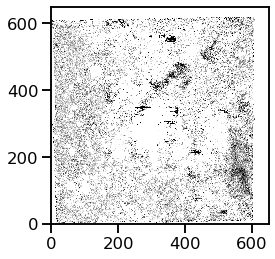

In [14]:
im9114 = Image(p("xxx-9114"))
im9112c = Image(p("CONT-9112"))

im9114.data -= im9112c.data
im9114.plot(vmin=-10, vmax=50, cmap="gray_r")

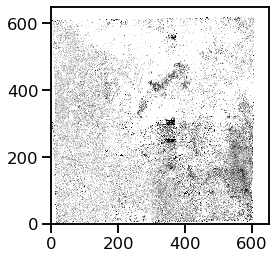

In [15]:
im8152 = Image(p("xxx-8152"))

im8152.plot(vmin=-10, vmax=50, cmap="gray_r")

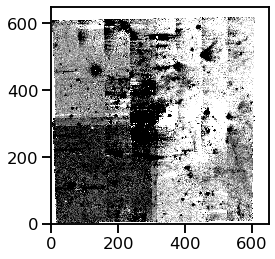

In [17]:
im8727 = Image(p("ci-8727"))
im8727.plot(vmin=-10, vmax=50, cmap="gray_r")

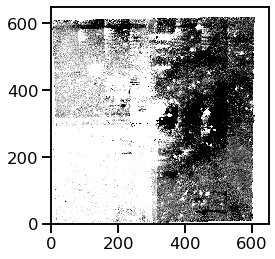

In [24]:
im8730c = Image(p("CONT-8730"))
im8727.data -= im8730c.data

im8727.plot(vmin=-150, vmax=150, cmap="gray_r")

## H I line ratios for reddening

## The O++ lines

In [25]:
im4959 = Image(p("oiii-4959"))
im4931 = Image(p("oiii-4931"))
im4642 = Image(p("oii-4642"))
im4650 = Image(p("oii-4650"))

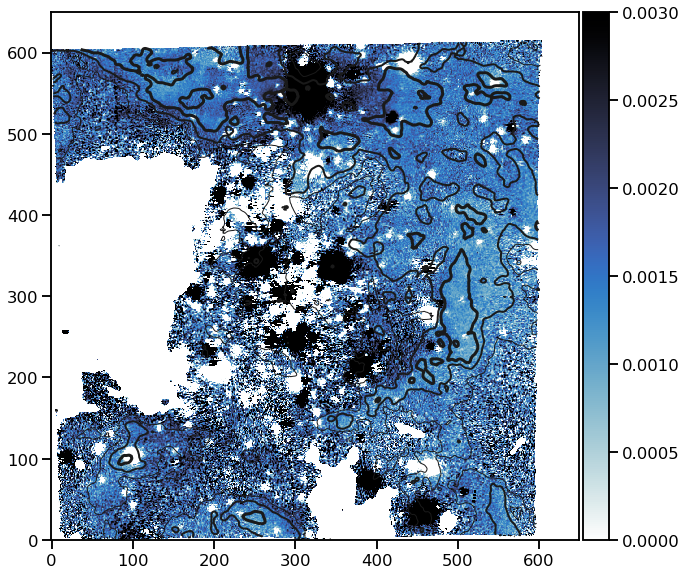

In [59]:
r = ((im4650 + im4642)/ im4959)
r.mask = r.mask | (im4959.data < 3e4)
fig, ax = plt.subplots(figsize=(10, 10))
r.plot(vmin=0, vmax=0.003, cmap=cm.arctic_r, colorbar="v")
ax.contour(im4959.data, levels=[1e5, 2e5, 4e5], linewidths=[1.0, 2.0, 3.0], colors="k")

This shows that the collisional lines are relatively stronger where the intensity is highest.  And that teh permitted lines are relatively higher in the inner parts. 

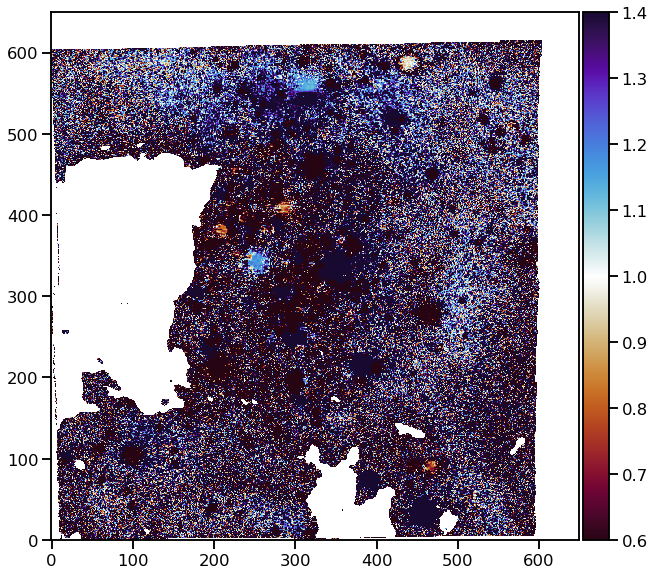

In [65]:
r = (im4642 / im4650)
r.mask = r.mask | (im4959.data < 3e4)
fig, ax = plt.subplots(figsize=(10, 10))
r.plot(vmin=0.6, vmax=1.4, cmap=cm.fusion, colorbar="v")